In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150
%matplotlib inline

In [7]:
df =pd.read_csv('NewspaperData.csv')

In [9]:
df.head(2)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298


In [17]:
df =df[['daily','sunday']] # here we extract only daily and sunday column because x =daily , y =sunday

In [15]:
df 

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [19]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   daily   34 non-null     float64
 1   sunday  34 non-null     float64
dtypes: float64(2)
memory usage: 676.0 bytes


# correlation
#to check the correlation between x and y we plot scatter plot

<Axes: xlabel='daily', ylabel='sunday'>

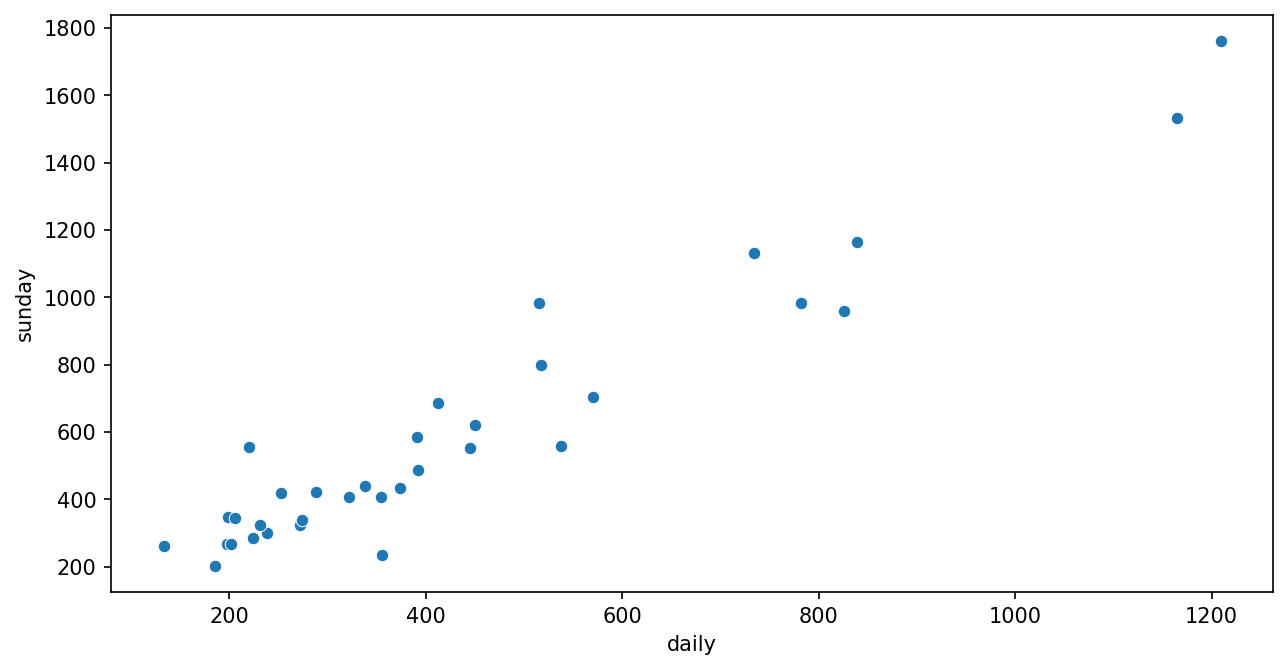

In [26]:
sns.scatterplot(x =df['daily'],y =df['sunday'])

In [28]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

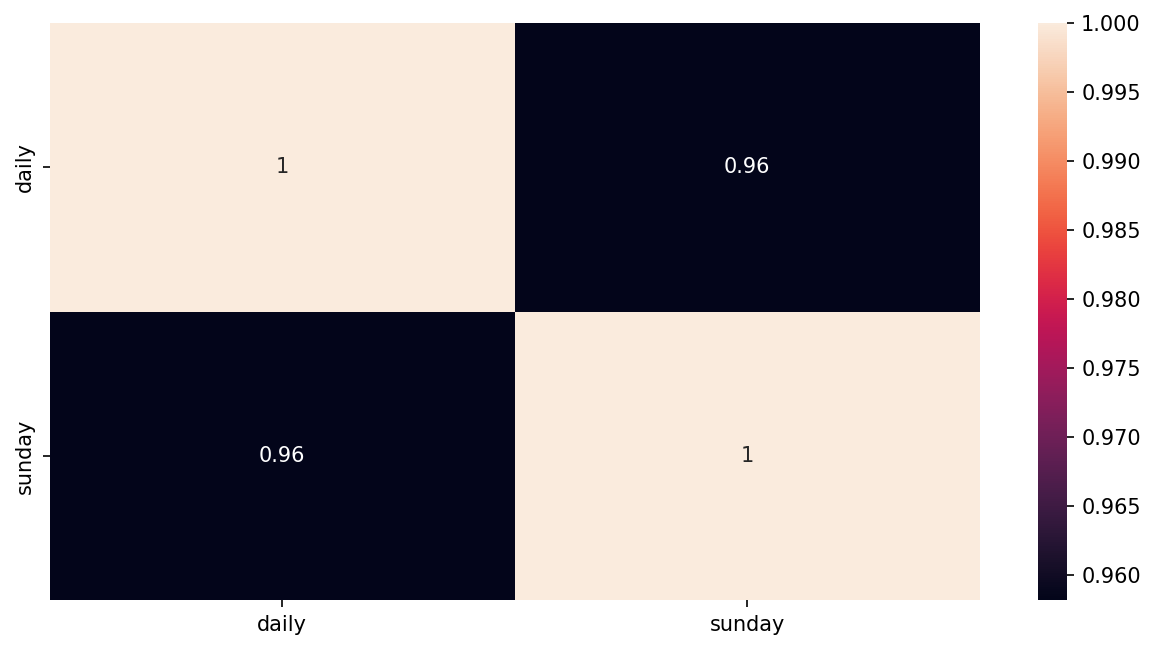

In [32]:
sns.heatmap(df.corr(),annot =True)

In [36]:
df.corr() # check correlation between sunday and daily 

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [38]:
# daily circulation effect the sunday circulation

In [40]:
# fitting a linear regression model

In [42]:
import statsmodels.formula.api as smf # stats model is used for various kind of mathematical calculation,hypothesis testing ,linear regression
model =smf.ols('sunday~daily',data =df).fit() #ols =ordinary list square # dependent_Variable ~ independent variables
# fit() method is used to the fit the regression line

In [44]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [50]:
sunday =13.83+1.33*200  # here we pass daily circulation as 200  ro calculate the sunday newspaper circulation


In [52]:
sunday

279.83

In [56]:
model.rsquared # this is our accuracy for model

0.9180596895873294

# visualisation

<Axes: xlabel='daily', ylabel='sunday'>

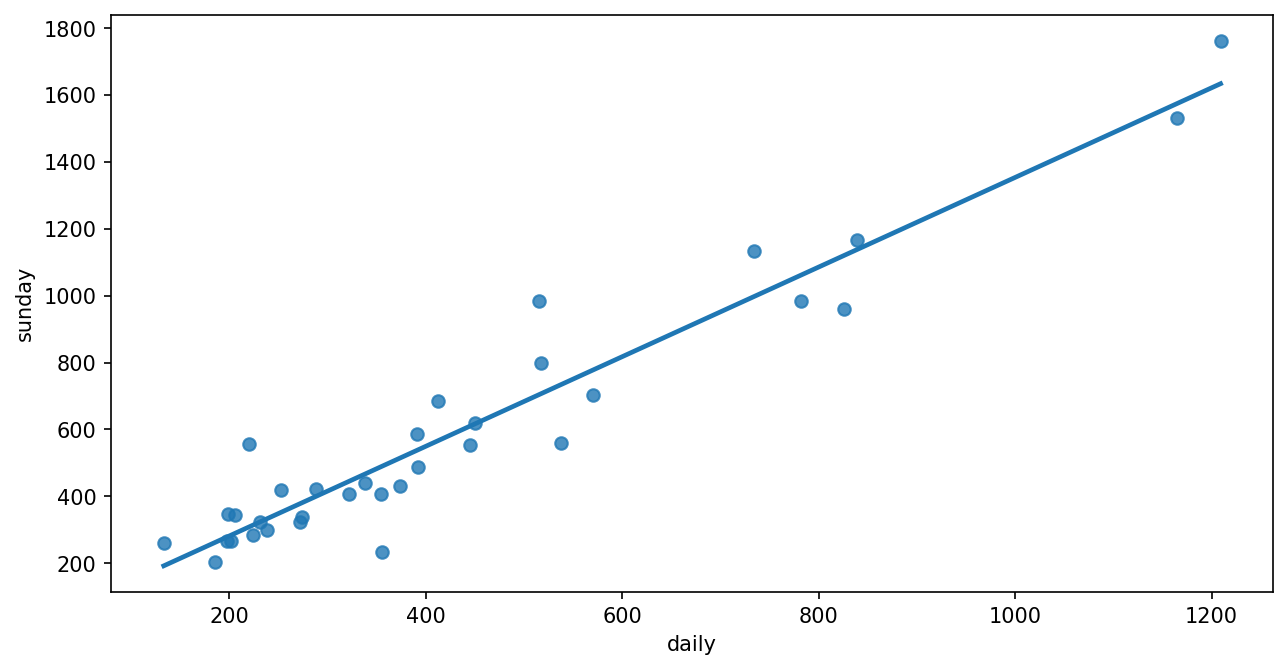

In [63]:
sns.regplot(x ="daily", y="sunday",data =df ,ci =None)
# ci is for confidence interval 

# predict the values for new datapoints

In [66]:
# predict the sunday circulation for 200 and 300 daily circulations

In [68]:
newdata =pd.Series([200,300])

In [70]:
newdata

0    200
1    300
dtype: int64

In [72]:
data_pred =pd.DataFrame(newdata,columns =['daily'])

In [74]:
data_pred

,daily
0,200
1,300


In [76]:
 model.predict(data_pred) #  model regression 

0    281.778581
1    415.750057
dtype: float64

In [78]:
data_pred =pd.DataFrame({'daily':[100,400,300,600,100,200]})

In [80]:
model.predict(data_pred)

0    147.807106
1    549.721533
2    415.750057
3    817.664485
4    147.807106
5    281.778581
dtype: float64

# Data Tranformation

# log tranformation

In [106]:
df['Daily_log'] =np.log(df['daily']) #np is for numpy  # this will remove skewness in the data try to convert in normall distributed
df # we add the new column in our dataset 

,daily,sunday,Daily_log,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316
5,733.775,1133.249,6.598202,7.032844
6,198.832,348.744,5.292460,5.854338
7,252.624,417.779,5.531902,6.034953
8,206.204,344.522,5.328866,5.842158
9,231.177,323.084,5.443184,5.777912


In [94]:
df['log_sunday'] =np.log(df['sunday'])
df.head(3)

,daily,sunday,Daily_log,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943


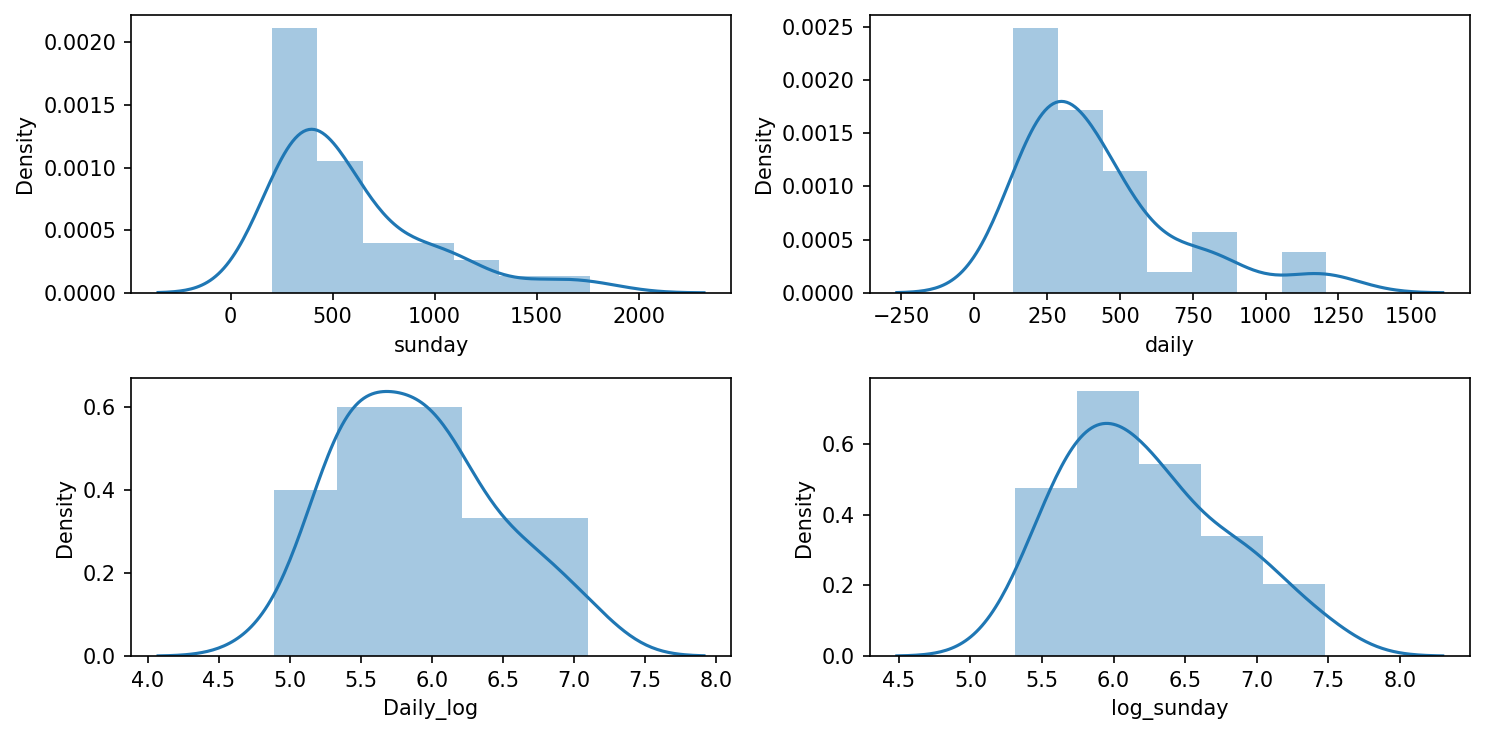

In [102]:
plt.subplot(2,2,2)
sns.distplot(df['daily'])

plt.subplot(2,2,1)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['Daily_log'])

plt.subplot(2,2,4)
sns.distplot(df['log_sunday'])
plt.tight_layout()


# square root transformation

In [109]:
df['sqrt_daily'] =np.sqrt(df['daily'])
df.head(2)

,daily,sunday,Daily_log,log_sunday,sqrt_daily
0,391.952,488.506,5.971139,6.191352,19.797778
1,516.981,798.298,6.248006,6.682482,22.737216


In [111]:
df['sqrt_sunday'] =np.sqrt(df["sunday"])
df.head(2)

,daily,sunday,Daily_log,log_sunday,sqrt_daily,sqrt_sunday
0,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,516.981,798.298,6.248006,6.682482,22.737216,28.254168


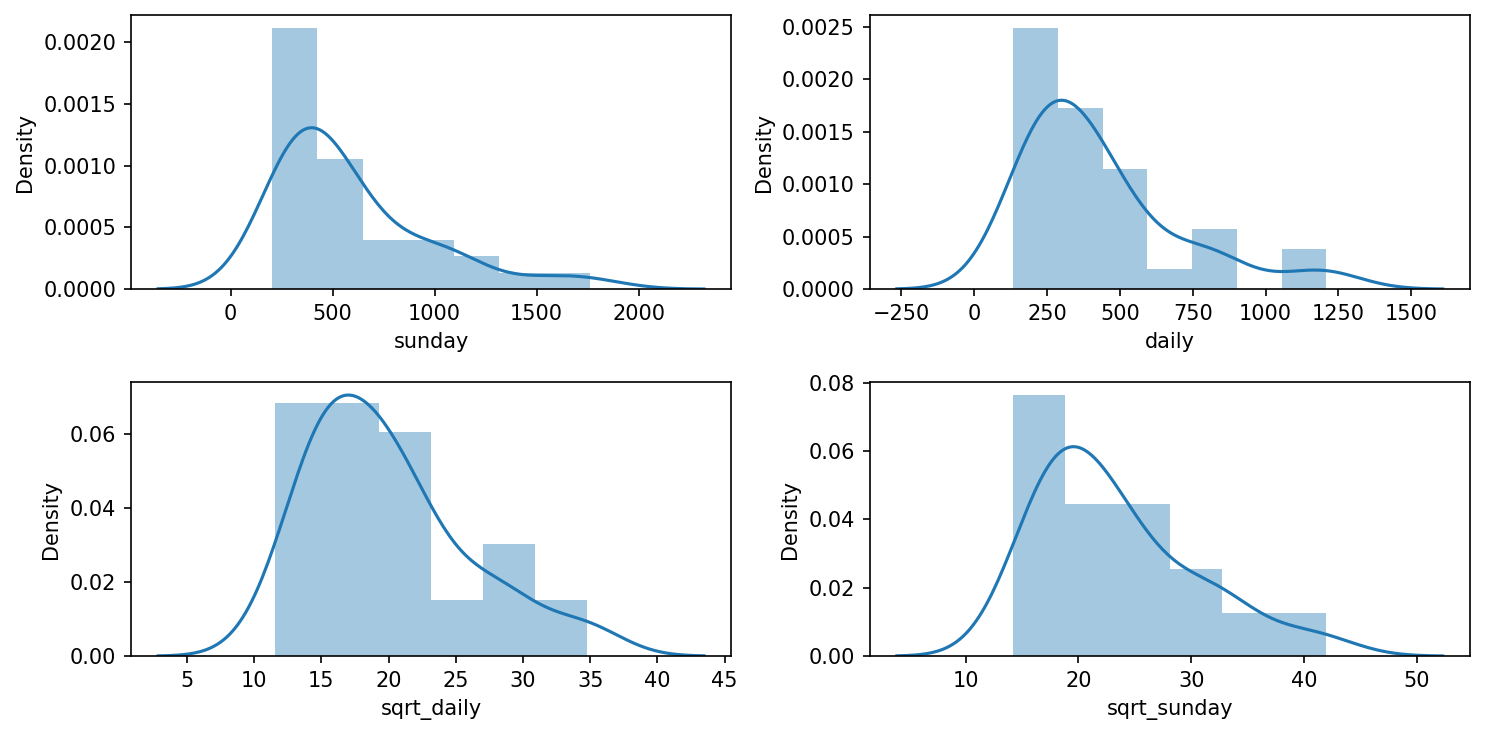

In [113]:
plt.subplot(2,2,2)
sns.distplot(df['daily'])

plt.subplot(2,2,1)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['sqrt_daily'])

plt.subplot(2,2,4)
sns.distplot(df['sqrt_sunday'])
plt.tight_layout()


In [115]:
1000/10

100.0

In [117]:
10*10

100

In [123]:
90*10

900